In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
batch_size = 32
img_height = 400
img_width = 400
data_dir = './anaselmasry/processed'
split = 0.3
seed = 679

In [3]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=split,
  subset="training",
  seed=seed,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1934 files belonging to 2 classes.
Using 1354 files for training.


In [4]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=split,
  subset="validation",
  seed=seed,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1934 files belonging to 2 classes.
Using 580 files for validation.


In [5]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [6]:
model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(64, activation='relu'),
  layers.Dense(1, activation='sigmoid')
])


In [7]:
metrics = [keras.metrics.TruePositives(name='tp'),
           keras.metrics.FalsePositives(name='fp'),
           keras.metrics.TrueNegatives(name='tn'),
           keras.metrics.FalseNegatives(name='fn'),
           keras.metrics.BinaryAccuracy(name='accuracy'),
           keras.metrics.Precision(name='precision'),
           keras.metrics.Recall(name='recall'),
           keras.metrics.AUC(name='auc')]

model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=metrics)

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 400, 400, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 400, 400, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 200, 200, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 200, 200, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 100, 100, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 50, 50, 64)        0

In [9]:
epochs=15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)



Epoch 1/15
43/43 [==============================] - 123s 3s/step - loss: 0.6912 - tp: 554.1818 - fp: 118.2273 - tn: 2.7273 - fn: 23.6364 - accuracy: 0.7866 - precision: 0.8228 - recall: 0.9457 - auc: 0.5203 - val_loss: 0.4139 - val_tp: 485.0000 - val_fp: 95.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.8362 - val_precision: 0.8362 - val_recall: 1.0000 - val_auc: 0.7745
Epoch 2/15
43/43 [==============================] - 107s 2s/step - loss: 0.3840 - tp: 575.8636 - fp: 114.2500 - tn: 12.3864 - fn: 9.7727 - accuracy: 0.8243 - precision: 0.8297 - recall: 0.9893 - auc: 0.7887 - val_loss: 0.3282 - val_tp: 475.0000 - val_fp: 89.0000 - val_tn: 6.0000 - val_fn: 10.0000 - val_accuracy: 0.8293 - val_precision: 0.8422 - val_recall: 0.9794 - val_auc: 0.8448
Epoch 3/15
43/43 [==============================] - 103s 2s/step - loss: 0.2973 - tp: 562.8864 - fp: 78.2273 - tn: 41.5682 - fn: 25.5909 - accuracy: 0.8490 - precision: 0.8738 - recall: 0.9575 - auc: 0.8858 - val_loss: 0.2975

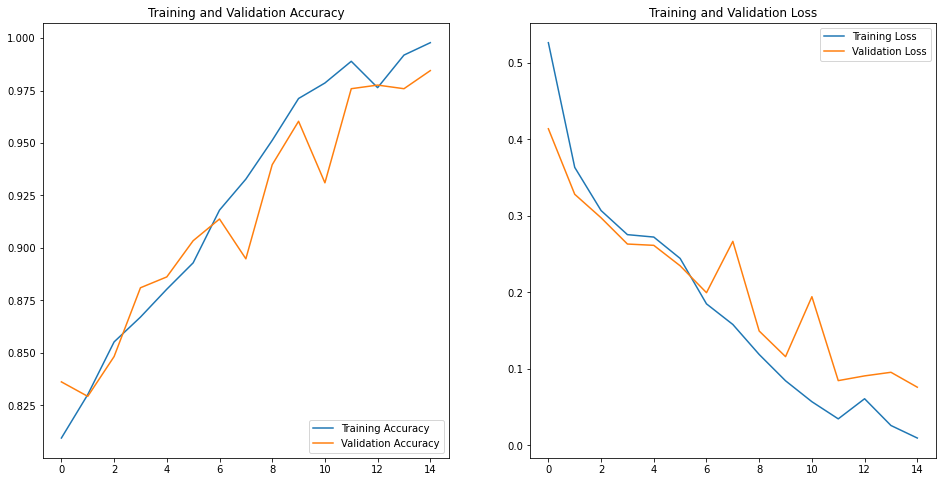

In [13]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()